<a href="https://colab.research.google.com/github/Archandra12/Deeplearning-Project/blob/codes/Copy_of_Copy_of_DEFCON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="180" /></center>




### Table of Content

1. [Predict Fuel Efficiency Overview](#section1)<br>
2. [The Auto MPG Dataset](#section2)<br>
  - 2.1 [Get the Data](#section201)<br>
  - 2.2 [Clean the Data](#section202)<br>
  - 2.3 [Split the Data into Train and Test](#section203)<br>
  - 2.4 [Inspect the Data](#section204)<br>
  - 2.5 [Split Features from Labels](#section205)<br>
  - 2.6 [Normalize the Data](#section206)<br>
3. [The Model](#section3)<br>
  - 3.1 [Build the Model](#section301)<br>
  - 3.2 [Inspect the Model](#section302)<br>
  - 3.3 [Train the Model](#section303)<br>
  - 3.4 [Make Predictions](#section304)<br>
4. [Model Tuning](#section4)<br>
  - 4.1 [Increasing the Number of Hidden Layers and Hidden Units](#section401)<br>
  - 4.2 [Weight Regularization](#section402)<br>
  - 4.3 [Dropout](#section403)<br>
  - 4.4 [Combined L2 + Dropout](#section404)<br>
  - 4.5 [Batch Normalization](#section405)<br>
5. [Conclusion](#section5)<br>

<a id=section1></a>
## 1. Predict DEFCON (Defense Readiness Condition)

Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its
implications. The DEFCON system allows the nation’s forces to be a step ahead of its rivals
A country has set up the DEFCON (Defense Readiness Condition) warning system. Defense readiness conditions (DEFCONs) describe progressive alert postures primarily for use between the Joint Chiefs of Staff and the commanders of unified commands.
DEFCONs are graduated to match situations of varying military severity. DEFCONs are phased increases in combat readiness.
It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict. In general terms, these are descriptions of DEFCONs:
- DEFCON 5 Normal peacetime readiness
- DEFCON 4 Normal, increased intelligence and - strengthened security measures
- DEFCON 3 Increase in force readiness above normal readiness
- DEFCON 2 Further Increase in force readiness, but less than maximum readiness
- DEFCON 1 Maximum force readiness.

As part of this excercise we will use Deep learning to train our models on dataset which has all necessary features to predict the DEFCON level required at a particular instance. We will analyse the data, train models, test their accuracies, verify their predictions. Main objective of this would be to use all the concepts required for ensuring the model predicts with best accuracy as DEFCON a mission critical task.

We will use the [DEFCON](https://github.com/Archandra12/Deeplearning-Project/blob/data/defcon_level.csv) Dataset and build a model to predict the DEFCON level for a given situation.



<center><img src="https://github.com/Archandra12/Deeplearning-Project/blob/images/DEFCON.jpg" width="340" height="80" /></center>

The DEFCON Dataset - Description

| Column                     |Description        |
| ---------------------------|--------------------------|		
|Allied_Nations|:The number of nations that have joined together as allies.|
|Diplomatic_Meetings_Set|:The number of meetings with the intent to resolve the conflict that is planned.|
|Percent_Of_Forces_Mobilized |:The percentage of forces mobilized.|
|Hostile_Nations |:The number of enemy nations that have allied together.|
|Active_Threats|:The number of situations or threats that require immediate attention.|
|Inactive_Threats|:The number of situations or threats being monitored for activity or escalation.|
|Citizen_Fear_Index|:The percentage of citizens who fear catastrophic military conflicts.|
|Closest_Threat_Distance(km) |:The closest threat to the border of the country in question.|
|Aircraft_Carriers_Responding|:The number of aircraft carriers actively traveling towards a threat to neutralize it.||
|Troops_Mobilized(thousands)|:The number of troops that are activated and responding to the threats being the most.|
|DEFCON_Level |:A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most. (**target variable**)|
|ID|:An ID to aid a checker script.|


<a id=section2></a>
## 2. Exploratory Data Analysis

<a id=section201></a>
### 2.1 Setup the environment

In [ ]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-lmjzty2u
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-lmjzty2u
     |████████████████████████████████| 1.0MB 4.0MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0c3714b889c3973113697918b6eeaab70af3b8501_-cp37-none-any.whl size=151172 sha256=de72f8ecba55dcf8448f2ecfee64c8c86a4dd0b29b3fbad4acd56b68174f2aa6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1kxxvxa_/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=6d86a9e48794fb654e8e6be3887ce13db742569575a935c3385aa9df7c377b18
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=7b3a1caee885762a1ae5db9b9607e5a11d4629d8556c1062d5d11bc2a39a79b8
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
#importing common libraries
import pathlib
import numpy as np
import pandas as pd
#libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import tensorflow
import tensorflow as tf
#import kerastuner, will be used for hyperparameter tuning
import kerastuner as kt
#lets check the version of tensorflow nd keras tuner
print(tf.__version__)
print(kt.__version__)
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, ReLU, LeakyReLU
from keras.callbacks import EarlyStopping

2.4.1
1.0.2


<a id=section202></a>
### 2.2 Get the Data

- Load data using Pandas Dataframe

In [ ]:
dataset_path = 'https://raw.githubusercontent.com/Archandra12/Deeplearning-Project/data/defcon_level.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


- We have a multiclass target variable in our dataset

<a id=section202></a>
### 2.2 Inspect the Data

- The dataset contains no unknown values.

In [ ]:
dataset.isna().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

- Checking Unique values in ID column

In [ ]:
dataset.ID.nunique()

10000

ID column has unique values and we can discard it.

In [ ]:
dataset.drop(['ID'], axis=1, inplace=True)

- As our target column is multiple value let's see the overall data distribution for each DEFCON level

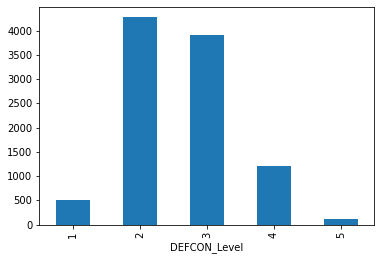

In [ ]:
dataset.groupby('DEFCON_Level')['DEFCON_Level'].count().plot(kind='bar')
plt.show()

- We can see that we have less data for DEFCON level 1 and 5. Our models may learn less for these levels

- We have data imbalance. We will use sampling techniques to balance data.

<a id=section203></a>
### 2.3 Split the Data into Train and Test

- Now we will split the dataset into a training set and a test set.

- We will use the test set in the final evaluation of our model.

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.shape, test_dataset.shape

((8000, 11), (2000, 11))

<a id=section204></a>
### 2.4 Basic EDA on the Train Data



Data Distribution based on DEFCON Level

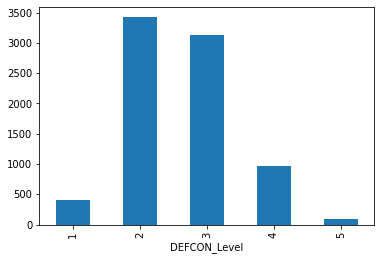

In [ ]:
train_dataset.groupby('DEFCON_Level')['DEFCON_Level'].count().plot(kind='bar')
plt.show()

- Drawing heatmap to see the correlation among variables

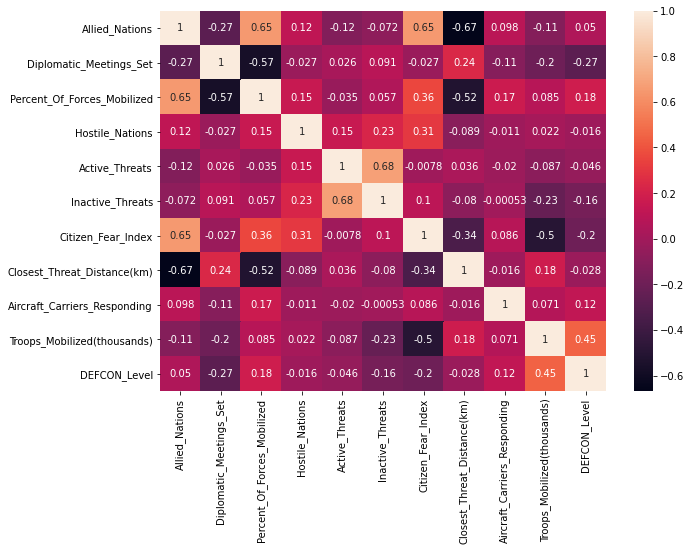

In [ ]:
# plotting the heatmap

fig= plt.figure(figsize=(10,7))
hm = sns.heatmap(data = train_dataset.corr(), annot=True)
  
# displaying the plotted heatmap
plt.show()

- We will have a quick look at the joint distribution of a few pairs of columns from the training set.

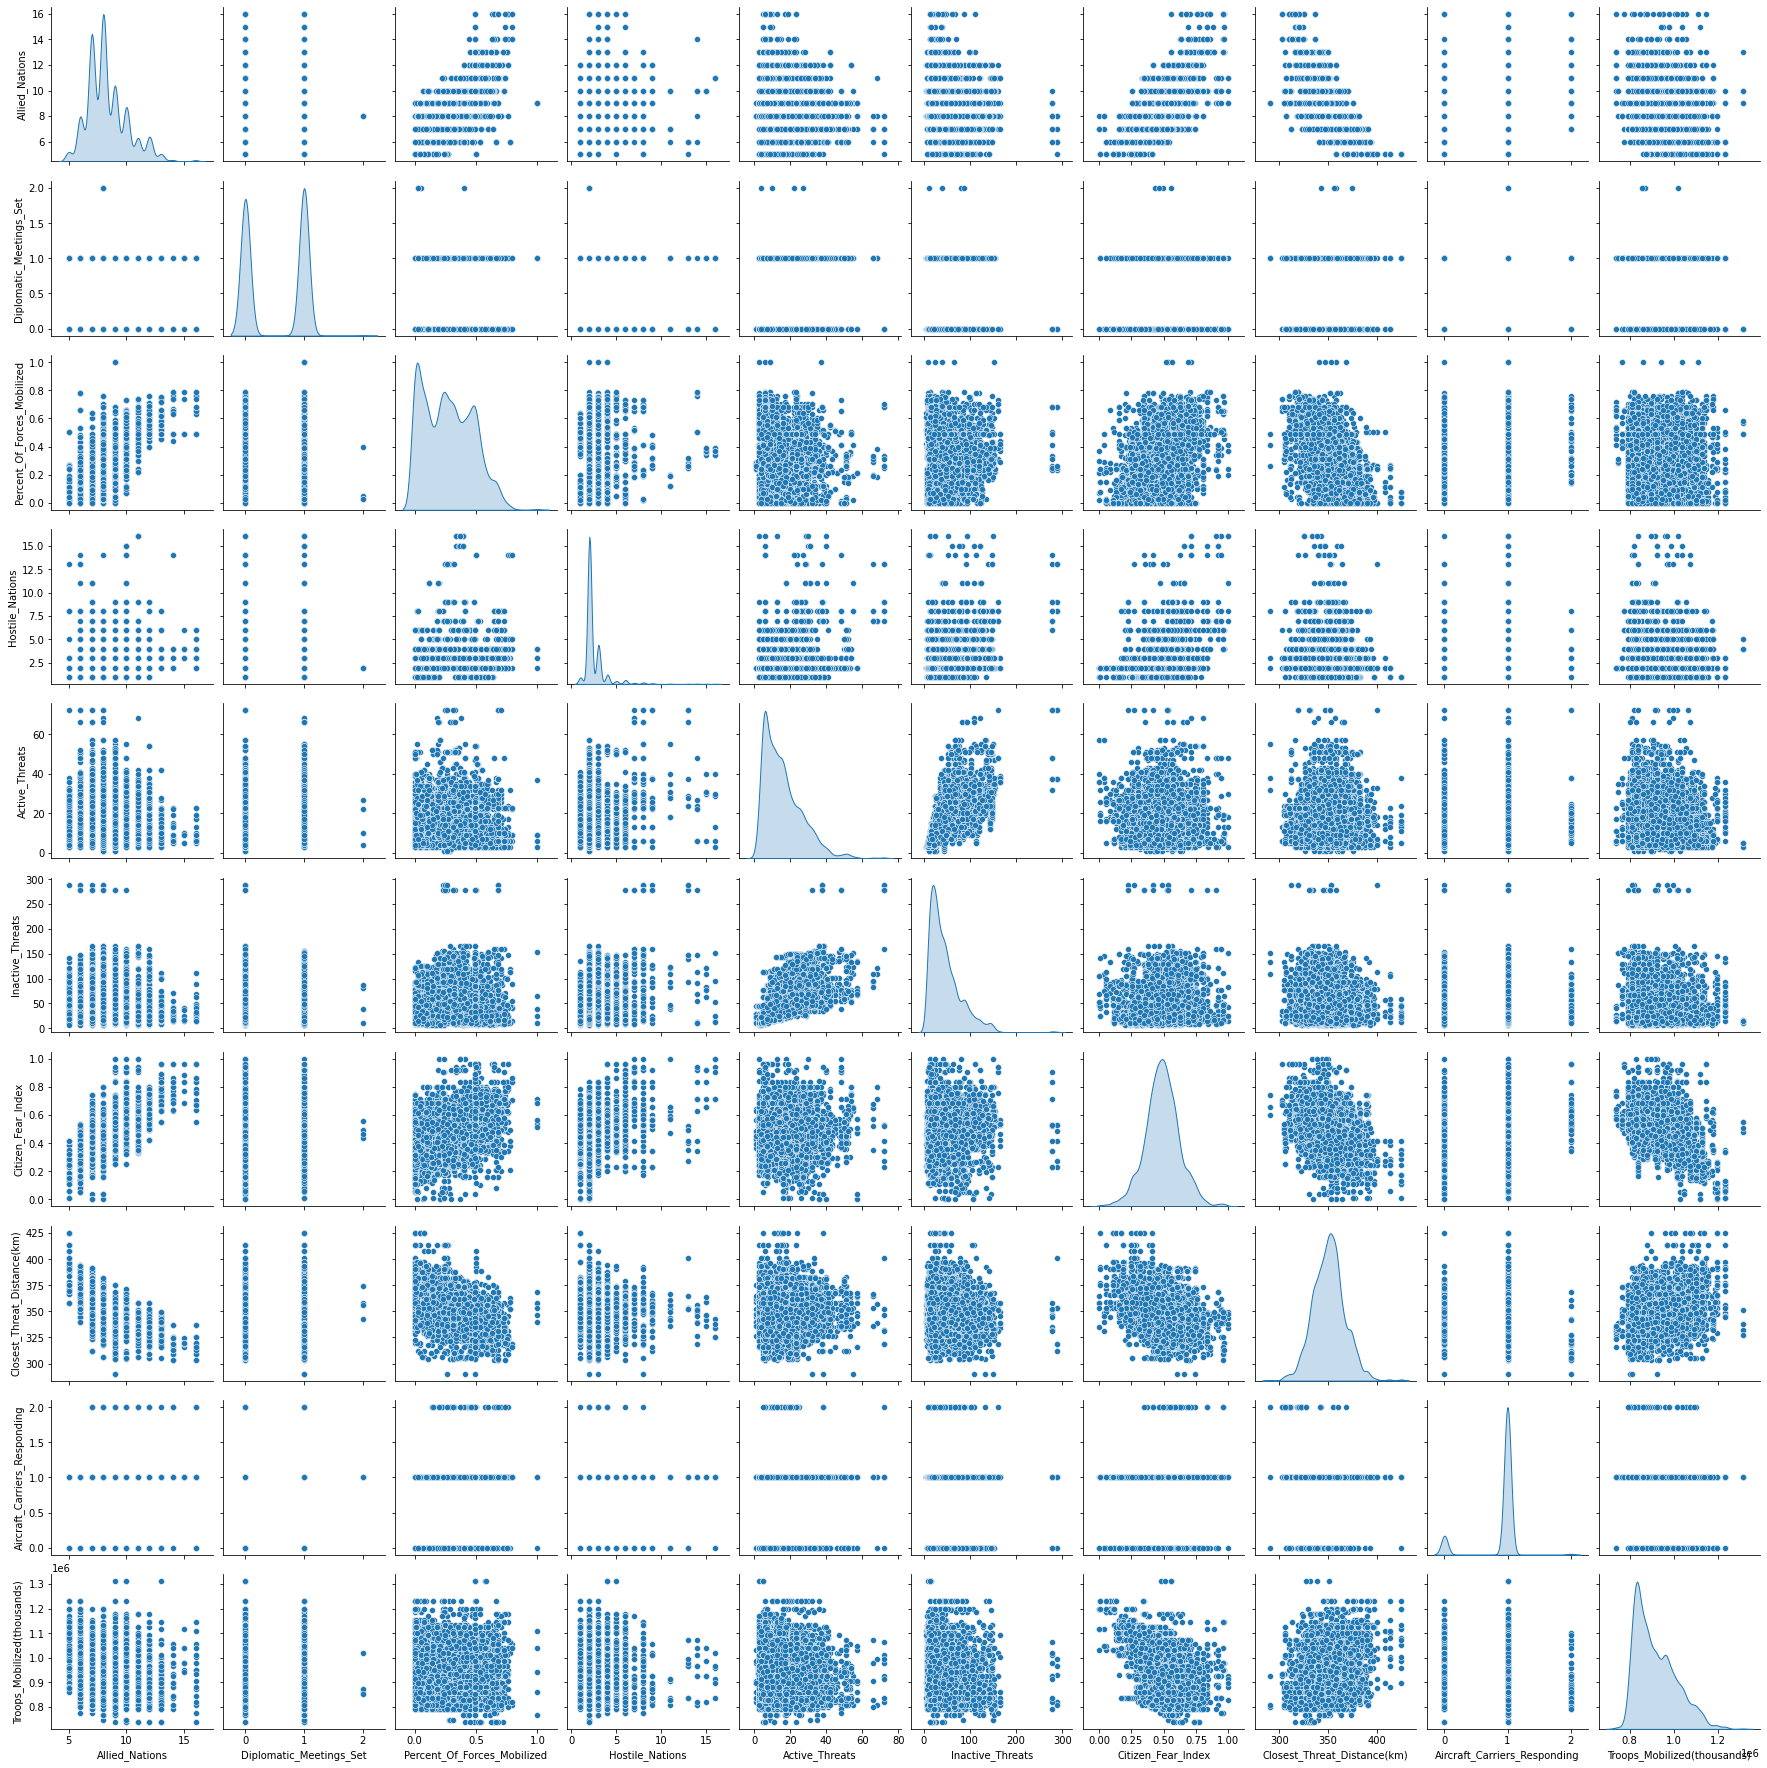

In [ ]:
sns.pairplot(train_dataset[['Allied_Nations', 'Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)', 'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)']], diag_kind="kde")

- Let's also look at the overall statistics:

In [ ]:
train_stats = train_dataset.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,8000.0,8.325500,1.750124,5.00,7.000000,8.000000,9.000000,16.00
Diplomatic_Meetings_Set,8000.0,0.519625,0.500646,0.00,0.000000,1.000000,1.000000,2.00
Percent_Of_Forces_Mobilized,8000.0,0.272294,0.196435,0.00,0.090000,0.260000,0.430000,1.00
Hostile_Nations,8000.0,2.503625,1.320683,1.00,2.000000,2.000000,3.000000,16.00
Active_Threats,8000.0,15.823500,10.431033,1.00,7.000000,13.000000,21.000000,72.00
Inactive_Threats,8000.0,46.737437,34.271553,6.00,21.000000,37.000000,63.000000,289.00
Citizen_Fear_Index,8000.0,0.487190,0.134526,0.00,0.406021,0.486784,0.567548,1.00
Closest_Threat_Distance(km),8000.0,350.752675,16.305571,290.44,340.260000,350.860000,360.400000,425.06
Aircraft_Carriers_Responding,8000.0,0.892000,0.328404,0.00,1.000000,1.000000,1.000000,2.00
Troops_Mobilized(thousands),8000.0,917189.350000,92447.709749,739200.00,836000.000000,897600.000000,976800.000000,1311200.00


In [ ]:
train_stats['mean']

Allied_Nations                       8.325500
Diplomatic_Meetings_Set              0.519625
Percent_Of_Forces_Mobilized          0.272294
Hostile_Nations                      2.503625
Active_Threats                      15.823500
Inactive_Threats                    46.737437
Citizen_Fear_Index                   0.487190
Closest_Threat_Distance(km)        350.752675
Aircraft_Carriers_Responding         0.892000
Troops_Mobilized(thousands)     917189.350000
DEFCON_Level                         2.615500
Name: mean, dtype: float64

<a id=section205></a>
### 2.5 Split Features from Labels

- Separate the target value, or "label", from the features.

- This label is the value that we will train the model to predict.

In [ ]:
X_train = train_dataset.loc[:, train_dataset.columns != 'DEFCON_Level']
y = train_dataset.DEFCON_Level

In [ ]:
# as our target variable is multiclass we will convert to dummy variables (i.e. one hot encoded) for training data
y_train_dummy = np_utils.to_categorical(y-1, num_classes=5)

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_test_dummy = np_utils.to_categorical(test_dataset.DEFCON_Level-1, num_classes=5)

In [ ]:
# checking shapes of train nd test target variables 
y_train_dummy.shape, y_test_dummy.shape

((8000, 5), (2000, 5))

<a id=section206></a>
### 2.6 Normalize the Data

- Look again at the `train_stats` block above and note how different the ranges of each feature are.

- It is good practice to normalize features that use different scales and ranges.

- Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

- **Note**: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset.

  - We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,8000.0,8.325500,1.750124,5.00,7.000000,8.000000,9.000000,16.00
Diplomatic_Meetings_Set,8000.0,0.519625,0.500646,0.00,0.000000,1.000000,1.000000,2.00
Percent_Of_Forces_Mobilized,8000.0,0.272294,0.196435,0.00,0.090000,0.260000,0.430000,1.00
Hostile_Nations,8000.0,2.503625,1.320683,1.00,2.000000,2.000000,3.000000,16.00
Active_Threats,8000.0,15.823500,10.431033,1.00,7.000000,13.000000,21.000000,72.00
Inactive_Threats,8000.0,46.737437,34.271553,6.00,21.000000,37.000000,63.000000,289.00
Citizen_Fear_Index,8000.0,0.487190,0.134526,0.00,0.406021,0.486784,0.567548,1.00
Closest_Threat_Distance(km),8000.0,350.752675,16.305571,290.44,340.260000,350.860000,360.400000,425.06
Aircraft_Carriers_Responding,8000.0,0.892000,0.328404,0.00,1.000000,1.000000,1.000000,2.00
Troops_Mobilized(thousands),8000.0,917189.350000,92447.709749,739200.00,836000.000000,897600.000000,976800.000000,1311200.00


In [ ]:
#Normalizing data for train and test
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

- This normalized data is what we will use to train the model.

- **Caution**: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.

  - That includes the test set as well as live data when the model is used in production.

In [ ]:
normed_train_data.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-3.545705e-16,-1.643685e-16,1.028377e-14,-8.253814e-17,5.045964e-17,-1.604272e-17,6.090982e-15,-7.041692e-14,2.080003e-16,4.684924e-16,4.309053e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.900152e+00,-1.037909e+00,-1.386179e+00,-1.138520e+00,-1.421096e+00,-1.188666e+00,-3.621521e+00,-3.698900e+00,-2.716163e+00,-1.925298e+00,-2.010379e+00
25%,-7.573751e-01,-1.037909e+00,-9.280116e-01,-3.813366e-01,-8.458894e-01,-7.509854e-01,-6.033748e-01,-6.435024e-01,3.288628e-01,-8.782192e-01,-7.659476e-01
50%,-1.859869e-01,9.595107e-01,-6.258438e-02,-3.813366e-01,-2.706827e-01,-2.841259e-01,-3.020193e-03,6.582106e-03,3.288628e-01,-2.118965e-01,4.784839e-01
75%,3.854014e-01,9.595107e-01,8.028428e-01,3.758471e-01,4.962596e-01,4.745207e-01,5.973344e-01,5.916582e-01,3.288628e-01,6.448040e-01,4.784839e-01
max,4.385119e+00,2.956931e+00,3.704569e+00,1.021924e+01,5.385516e+00,7.068911e+00,3.811960e+00,4.557174e+00,3.373889e+00,4.261984e+00,2.967347e+00


<a id=section3></a>
## 3. The Model

<a id=section301></a>
### 3.1 Build the Model

- Let's build our model.

11 inputs -> [8 hidden nodes] -> 5 outputs </br> Layer Activation: 'Relu'</br>
Output Layer Activation: “softmax” ; This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.</br>
Finally, the network uses the efficient 'Adam' gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.

- The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [ ]:
#Checking number of inputs features and output nodes
normed_train_data.shape[1], y_train_dummy.shape[1]

(11, 5)

- We have 5 outputs

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(8, activation='relu', input_shape=(normed_train_data.shape[1],),  kernel_initializer='zeros'))
  model.add(Dense(y_train_dummy.shape[1], activation='softmax'))  

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(0.001)
  # Compiling the model
  model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
model = build_model()

<a id=section302></a>
### 3.2 Inspect the Model

- Using the `.summary` method to print a simple description of the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


- Now let's try out the model.

- Taking a batch of `10` examples from the training data and calling `model.predict` on it.

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print('Shape of Predictions: ', example_result.shape)
example_result

Shape of Predictions:  (10, 5)


array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]], dtype=float32)

- It seems to be working, and it produces a result of the expected shape and type.

- We haven't trained the model yet, and as a result the above predictions are like this. 

<a id=section303></a>
### 3.3 Train the Model

- Training the model for 200 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [ ]:
EPOCHS = 200

In [ ]:
history = model.fit(normed_train_data, y_train_dummy, epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.3936,  loss:1.5406,  val_accuracy:0.4094,  val_loss:1.4740,  
....................
Epoch: 20, accuracy:0.4298,  loss:1.1925,  val_accuracy:0.4175,  val_loss:1.1715,  
....................
Epoch: 40, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1692,  
....................
Epoch: 60, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1691,  
....................
Epoch: 80, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1692,  
....................
Epoch: 100, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1691,  
....................
Epoch: 120, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1691,  
....................
Epoch: 140, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1691,  
....................
Epoch: 160, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1693,  
....................
Epoch: 180, accuracy:0.4298,  loss:1.1906,  val_acc

- Visualizing the model's training progress using the stats stored in the `history` object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.190631,0.429844,1.169291,0.4175,195
196,1.190591,0.429844,1.169138,0.4175,196
197,1.190611,0.429844,1.169198,0.4175,197
198,1.190586,0.429844,1.169120,0.4175,198
199,1.190603,0.429844,1.169108,0.4175,199


- We are using `tfdocs.plots.HistoryPlotter()` to plot our model history.


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

- Specifying the name of our **history** object in the `plotter.plot()` method.

- We also need to specify the **metric** we want to plot.

- Plotting the **accuracy** plot for train and val set.
- Plotting the **loss** plot for train and val set.

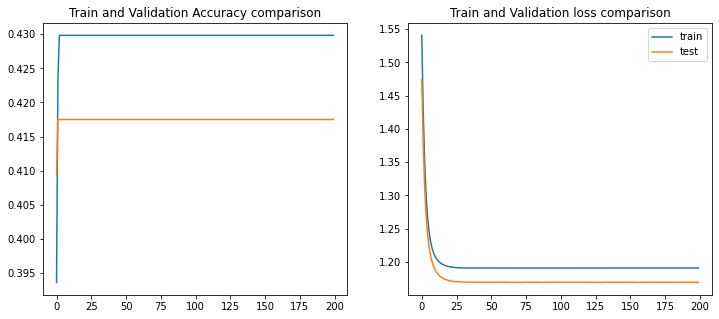

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(12,5))

axis[0].plot(history.history['accuracy'], label='train')
axis[0].plot(history.history['val_accuracy'], label='test')
axis[0].set_title("Train and Validation Accuracy comparison")
axis[1].plot(history.history['loss'], label='train')
axis[1].plot(history.history['val_loss'], label='test')
axis[1].set_title("Train and Validation loss comparison")
plt.legend()
plt.show()

- Looking at Accuracy graph we can see training and validation accuracy reaches 95% in 10 epochs.

- Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve.

- We'll use an *EarlyStopping callback* that tests a training condition for  every epoch.

  - If a set amount of epochs elapses without showing improvement, then automatically stop the training.

In [ ]:
model = build_model()

In [ ]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
early_history = model.fit(normed_train_data, y_train_dummy, epochs=EPOCHS, validation_split=0.2,
                          verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1693,  
....................
Epoch: 20, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1691,  
....................
Epoch: 40, accuracy:0.4298,  loss:1.1906,  val_accuracy:0.4175,  val_loss:1.1690,  
.................

In [ ]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
52,1.190552,0.429844,1.169096,0.4175,52
53,1.190570,0.429844,1.169077,0.4175,53
54,1.190587,0.429844,1.169007,0.4175,54
55,1.190609,0.429844,1.169089,0.4175,55
56,1.190599,0.429844,1.169117,0.4175,56


- The training stopped before completing the 20 epochs due to our EarlyStopping callback.

Text(0, 0.5, 'loss [DEFCON_level]')

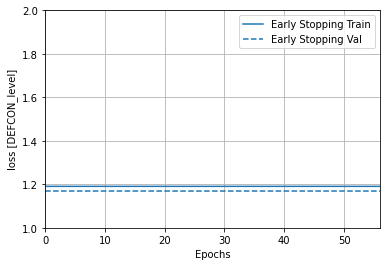

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric="loss")
plt.ylim([1, 2])
plt.ylabel('loss [DEFCON_level]')

- The graph shows that on the validation set, the average error is usually around **+/- 2 MPG**.

- Is this good? We'll leave that decision up to you.

- Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.

- This tells us how well we can expect the model to predict when we use it in the real world.

Text(0, 0.5, 'loss [DEFCON_level]')

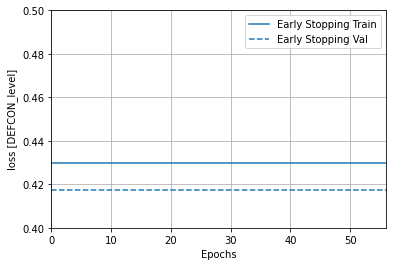

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric="accuracy")
plt.ylim([0.4, .5])
plt.ylabel('loss [DEFCON_level]')

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(normed_train_data, y_train_dummy, verbose=0)
_, test_acc = model.evaluate(normed_test_data, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))



Train: 0.427, Test: 0.426


- Model is giving high accuracy for training as well as for test. This could be due to data is synthatic

<a id=section304></a>
### 3.4 Make Predictions

- Finally, **predict DEFCON levels** values using data in the testing set and comparing the results:

In [ ]:
#get predictions
test_predictions = model.predict(normed_test_data)

In [ ]:
#get the max probability for each 
test_pred = np.argmax(test_predictions, axis=1)

In [ ]:
#get the actual values of DEFCON level in the test data
y_test_actual = test_dataset.DEFCON_Level

In [ ]:
#Checking the shaoe of predicted value
test_pred.shape, y_test_actual.shape

((2000,), (2000,))

In [ ]:
test_predictions.shape, y_test_dummy.shape

((2000, 5), (2000, 5))

- Let's see Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_actual, test_pred)

In [ ]:
import itertools 
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [ ]:
y_test_actual.unique()

array([3, 2, 4, 1, 5])

In [ ]:
test_pred+1

array([2, 2, 2, ..., 2, 2, 2])

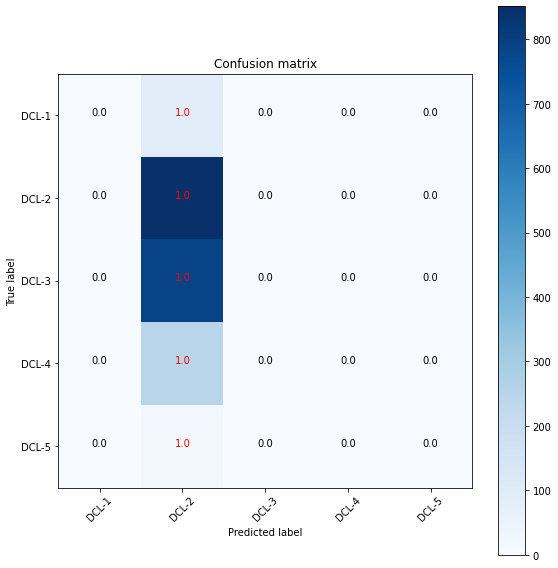

In [ ]:
import sklearn.metrics
import numpy

#print(y_test_actual.shape, test_pred.shape)
cm = sklearn.metrics.confusion_matrix(y_test_actual, test_pred+1)
#print(cm)
#print(cm.shape)
class_names = np.array(['DCL-1','DCL-2','DCL-3','DCL-4','DCL-5'])
figure = plot_confusion_matrix(cm, class_names=class_names)
#cm_image = plot_to_image(figure)

- It looks like our model predicts reasonably well or we can say we have synthetic data so model has given near perfect results.

- We could see some false predictions for DEFCON level 5 

<a id=section4></a>
## 4. Model Tuning

- We have already achieved very good result on our test set.

- If we train the model for too long, the model will start to overfit and learn patterns from the training data that don't generalize to the test data.

  - We need to strike a balance.
  
  - We have already learned how to train for an appropriate number of epochs using the **Early Stopping** callback.

- And, now we will experiment some additional methods to **improve** the model **performance** and reduce overfitting.

  - These methods will all be applied during model building.

<a id=section401></a>
### 4.1 Increasing the Number of Hidden Layers and Hidden Units

- We can improve model performance by increasing the number of hidden layers and hidden units in the model.

  - But this can result in overfitting.

- Here, we are increasing the number of **hidden layers** from 2 to **4** i. e. adding 2 additional layers.

- Next, we are using **32 hidden units** instead of 8.

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(normed_train_data.shape[1],)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(y_train_dummy.shape[1], activation='softmax'))  
  

  return model
multilayered_model = build_model()

In [ ]:
multilayered_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 165       
Total params: 3,717
Trainable params: 3,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
#model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
multilayered_model.compile( optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


- We are not using the Early Stopping callback now.

- The model will be trained for **20 epochs**.

In [ ]:
history_multilayered = multilayered_model.fit(normed_train_data, y_train_dummy, epochs=20, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=5)])


Epoch: 0, accuracy:0.7684,  loss:0.6701,  val_accuracy:0.9656,  val_loss:0.1653,  
.....
Epoch: 5, accuracy:0.9994,  loss:0.0030,  val_accuracy:0.9994,  val_loss:0.0021,  
.....
Epoch: 10, accuracy:1.0000,  loss:0.0001,  val_accuracy:1.0000,  val_loss:0.0001,  
.....
Epoch: 15, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 20, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 25, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 30, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 35, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 40, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 45, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 50, accuracy:1.0000,  loss:0.0000,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 55, 

In [ ]:
df_multilayered_model = pd.DataFrame(history_multilayered.history)
df_multilayered_model['epoch'] = history_multilayered.epoch
df_multilayered_model.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.303851e-10,1.000000,2.823737e-08,1.0,195
196,3.337129e-07,1.000000,6.705521e-10,1.0,196
197,1.635823e-03,0.999844,5.811432e-09,1.0,197
198,4.842875e-10,1.000000,8.717119e-09,1.0,198
199,1.187035e-02,0.999219,1.974307e-05,1.0,199


Text(0, 0.5, 'Accuracy- DEFCON Level')

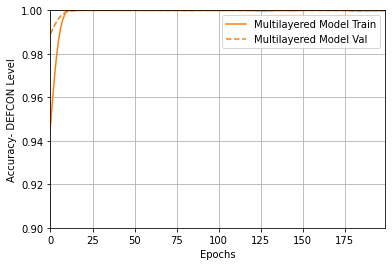

In [ ]:
plotter.plot({'Multilayered Model': history_multilayered}, metric="accuracy")
plt.ylim([0.9, 1])
plt.ylabel('Accuracy- DEFCON Level')

Text(0, 0.5, 'Loss - DEFCON Level')

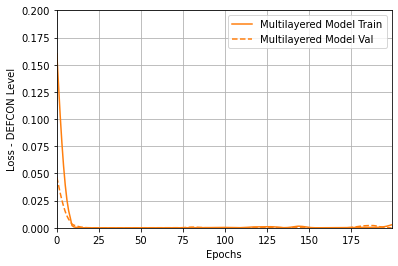

In [ ]:
plotter.plot({'Multilayered Model': history_multilayered}, metric="loss")
plt.ylim([0, .2])
plt.ylabel('Loss - DEFCON Level')

In [ ]:
# evaluate the model
_, train_acc = multilayered_model.evaluate(normed_train_data, y_train_dummy, verbose=0)
_, test_acc = multilayered_model.evaluate(normed_test_data, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


- We get a significant increase in the test set error.

- The larger model is **overfitting** the train set.

- The performance on the test set is worse than our smaller model.

<a id=section402></a>
### 4.2 Weight Regularization

- Regularization places **constraints** on the quantity and type of information the model can store.

- If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

- We can put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".

- This is called "**weight regularization**", and it is done by adding to the loss function of the network a cost associated with having large weights.

- This cost comes in two flavors:

  - L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

  - L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights).
    - L2 regularization is also called weight decay in the context of neural networks.
    
    - Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

- L1 regularization pushes weights towards exactly zero encouraging a sparse model.

- L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights.

  - One reason why L2 is more common.

- In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

- Let's add L2 weight regularization to the model.

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(normed_train_data.shape[1],)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(y_train_dummy.shape[1], activation='softmax'))  
  

  return model
l2_model = build_model()

- `l2(0.001)` means that every coefficient in the weight matrix of the layer will add `(0.001 * weight_coefficient_value**2)` to the total loss of the network.

In [ ]:
l2_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 165       
Total params: 3,717
Trainable params: 3,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
l2_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_l2 = l2_model.fit(normed_train_data, y_train_dummy, epochs=20, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=5)])


Epoch: 0, accuracy:0.7469,  loss:0.8816,  val_accuracy:0.9663,  val_loss:0.3774,  
.....
Epoch: 5, accuracy:0.9998,  loss:0.0562,  val_accuracy:1.0000,  val_loss:0.0473,  
.....
Epoch: 10, accuracy:1.0000,  loss:0.0167,  val_accuracy:1.0000,  val_loss:0.0158,  
.....
Epoch: 15, accuracy:1.0000,  loss:0.0111,  val_accuracy:1.0000,  val_loss:0.0106,  
.....

In [ ]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.011109,1.0,0.010607,1.0,15
16,0.010534,1.0,0.010174,1.0,16
17,0.010065,1.0,0.009741,1.0,17
18,0.009666,1.0,0.009371,1.0,18
19,0.009283,1.0,0.009224,1.0,19


Text(0, 0.5, 'DEFCON level')

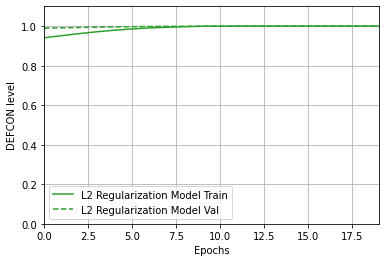

In [ ]:
plotter.plot({'L2 Regularization Model': history_l2}, metric="accuracy")
plt.ylim([0, 1.1])
plt.ylabel('DEFCON level')

Text(0, 0.5, 'DEFCON level')

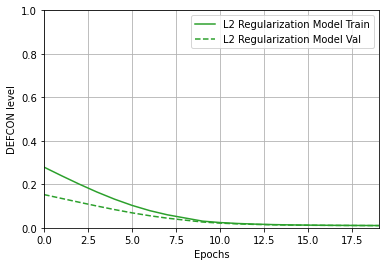

In [ ]:
plotter.plot({'L2 Regularization Model': history_l2}, metric="loss")
plt.ylim([0, 1])
plt.ylabel('DEFCON level')

In [ ]:
# evaluate the model
_, train_acc = l2_model.evaluate(normed_train_data, y_train_dummy, verbose=0)
_, test_acc = l2_model.evaluate(normed_test_data, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


- After adding L2 regularization, the test set error is reduced.

- The performance on the test set is better than the larger model.

- The L2 regularized model is much more resistant to overfitting than the larger model.

<a id=section403></a>
### 4.3 Dropout

- Dropout is one of the **most effective** and **most commonly used** regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

- The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

- Dropout, applied to a layer, consists of **randomly** "**dropping out**" (i.e. set to zero) a number of **output features** of the layer during training.

  - Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training.
  
  - After applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

- The "**dropout rate**" is the fraction of the features that are being zeroed-out; it is usually set between **0.2** and **0.5**.

- *At test time*, **no units are dropped out**, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

- In `tf.keras` we can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

- Let's add Dropout layers in our network to see how well they do at reducing overfitting.

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(normed_train_data.shape[1],)))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(y_train_dummy.shape[1], activation='softmax'))  
  

  return model
dropout_model = build_model()

In [ ]:
dropout_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                384       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)               

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_dropout = dropout_model.fit(normed_train_data, y_train_dummy, epochs=20, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.6317,  loss:1.0095,  val_accuracy:0.9331,  val_loss:0.4686,  
....................................................................................................

In [ ]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.019964,0.995469,0.008263,0.998125,95
96,0.024909,0.995781,0.003179,0.998750,96
97,0.022432,0.995156,0.010007,0.998125,97
98,0.026495,0.994844,0.012862,0.997500,98
99,0.027344,0.994687,0.018714,0.996875,99


Text(0, 0.5, 'DEFCON Level')

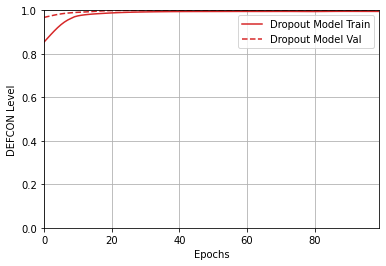

In [ ]:
plotter.plot({'Dropout Model': history_dropout}, metric="accuracy")
plt.ylim([0, 1])
plt.ylabel('DEFCON Level')

In [ ]:
# evaluate the model
_, train_acc = dropout_model.evaluate(normed_train_data, y_train_dummy, verbose=0)
_, test_acc = dropout_model.evaluate(normed_test_data, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.999


- After adding the dropout the model is generalizing well on the test set.

- The performance is better than the larger model.

<a id=section404></a>
### 4.4 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(normed_train_data.shape[1],)))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(y_train_dummy.shape[1], activation='softmax'))  
  

  return model
l2_dropout_model = build_model()

In [ ]:
l2_dropout_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                384       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)               

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
l2_dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_l2_dropout = l2_dropout_model.fit(normed_train_data, y_train_dummy, epochs=20, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=5)])


Epoch: 0, accuracy:0.6802,  loss:1.0509,  val_accuracy:0.9175,  val_loss:0.5474,  
.....
Epoch: 5, accuracy:0.9656,  loss:0.2096,  val_accuracy:0.9981,  val_loss:0.1284,  
.....
Epoch: 10, accuracy:0.9827,  loss:0.1212,  val_accuracy:0.9931,  val_loss:0.0771,  
.....
Epoch: 15, accuracy:0.9891,  loss:0.0861,  val_accuracy:0.9900,  val_loss:0.0568,  
.....

In [ ]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.086091,0.989062,0.056824,0.99,15
16,0.087028,0.988125,0.050074,1.00,16
17,0.073414,0.990781,0.047911,1.00,17
18,0.073477,0.990000,0.044758,1.00,18
19,0.065995,0.992031,0.041610,1.00,19


Text(0, 0.5, 'DEFCON level Accuracy')

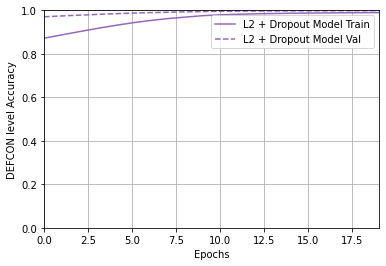

In [ ]:
plotter.plot({'L2 + Dropout Model': history_l2_dropout}, metric="accuracy")
plt.ylim([0, 1])
plt.ylabel('DEFCON level Accuracy')

Text(0, 0.5, 'DEFCON level loss')

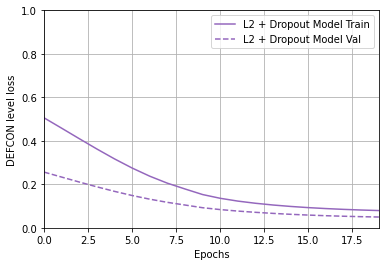

In [ ]:
plotter.plot({'L2 + Dropout Model': history_l2_dropout}, metric="loss")
plt.ylim([0, 1])
plt.ylabel('DEFCON level loss')

In [ ]:
# evaluate the model
_, train_acc = l2_dropout_model.evaluate(normed_train_data, y_train_dummy, verbose=0)
_, test_acc = l2_dropout_model.evaluate(normed_test_data, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


- The combined L2 + Dropout model is also outperforming the larger model.

- We can attain a better score if we apply the Early Stopping callback to this model.

<a id=section405></a>
### 4.5 Batch Normalization

- Batch normalization is a technique for training very deep neural networks.

    - It **normalizes** the **activations** of the previous layer at each batch.

    - It applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

- This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

- Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer.

- It may be more appropriate **after** the activation function for **s-shaped** functions like the **hyperbolic tangent** and **logistic** function.

- It may be more appropriate **before** the activation function for activations that may result in **non-Gaussian** distributions like the **rectified linear** activation function, the modern default for most network types.

- Since we are using **ReLU** activation function in our model, we will use the Batch Normalization layer **prior** to the ReLU layer.

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, input_shape=(normed_train_data.shape[1],)))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(32))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(32))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(32))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(y_train_dummy.shape[1], activation='softmax'))    

  return model
bnorm_model = build_model()

In [ ]:
bnorm_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                384       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
bnorm_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_batch_norm = bnorm_model.fit(normed_train_data, y_train_dummy, epochs=20, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots(report_every=5)])


Epoch: 0, accuracy:0.9995,  loss:0.0020,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 5, accuracy:0.9984,  loss:0.0061,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 10, accuracy:0.9997,  loss:0.0009,  val_accuracy:1.0000,  val_loss:0.0000,  
.....
Epoch: 15, accuracy:0.9986,  loss:0.0039,  val_accuracy:1.0000,  val_loss:0.0000,  
.....

In [ ]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.003903,0.998594,4.194549e-08,1.0,15
16,0.003018,0.999219,1.108559e-07,1.0,16
17,0.007573,0.998594,2.309678e-09,1.0,17
18,0.012854,0.997187,1.877529e-08,1.0,18
19,0.002874,0.998906,2.413948e-08,1.0,19


Text(0, 0.5, 'DEFCON Level')

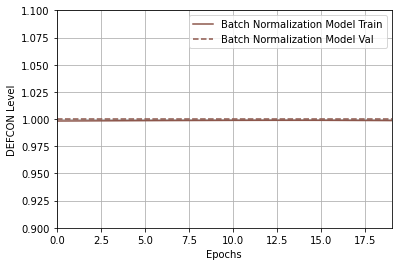

In [ ]:
plotter.plot({'Batch Normalization Model': history_batch_norm}, metric="accuracy")
plt.ylim([0.9, 1.1])
plt.ylabel('DEFCON Level')

Text(0, 0.5, 'DEFCON Level')

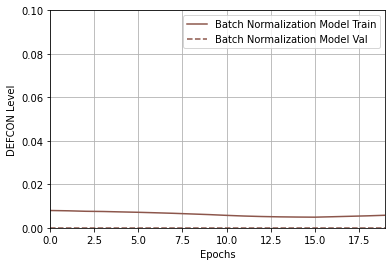

In [ ]:
plotter.plot({'Batch Normalization Model': history_batch_norm}, metric="loss")
plt.ylim([0, 0.1])
plt.ylabel('DEFCON Level')

In [ ]:
# evaluate the model
_, train_acc = bnorm_model.evaluate(normed_train_data, y_train_dummy, verbose=0)
_, test_acc = bnorm_model.evaluate(normed_test_data, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


- The Batch Normalization model attains the **lowest test set error**.

- We have significantly **reduced** the **overfitting**.

- It is generalizing well on the test set.

- We can also incorporate the Early Stopping callback to this model to stop training at an appropriate epoch.

<a id=section5></a>
## 5. Hyperparamter Tuning

<a id=section6></a>
## 6. Conclusion

We studied a few techniques to handle a regression problem.

- **Mean Squared Error** (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).

- Similarly, evaluation metrics used for regression differ from classification.

  - A common regression metric is **Mean Absolute Error** (MAE).

- When numeric input data features have values with different ranges, each **feature** should be **scaled** independently to the same range.

- If there is not much training data, one technique is to prefer a **small network** with few hidden layers to avoid overfitting.

- **Early stopping** is a useful technique to prevent overfitting.

- We can improve the performance of a model by increasing the number of hidden layers and the hidden units in the model.

- Regularization Techniques to reduce overfitting are:

  - **Weight Regularization**

  - **Dropout**

  - **Batch Normalization**